# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [40]:
# import everything we need
import numpy as np
import pandas as pd

In [41]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [42]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above
df = pd.read_csv('boston.csv')
print(df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  MEDV  
0  296.0     15.3  396.90   4.98  24.0  
1  242.0     17.8  396.90   9.14  21.6  
2  242.0     17.8  392.83   4.03  34.7  
3  222.0     18.7  394.63   2.94  33.4  
4  222.0     18.7  396.90   5.33  36.2  


## Model Training

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [44]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = df[['LSTAT']]
y = df['MEDV']

In [45]:
# We need 2D arrays for x_train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (354, 1)
y_train shape: (354,)


In [46]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

In [47]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [48]:
y_pred = reg.predict(X_test)

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [49]:
# we can see the coefficient and intercept our model finds
from sklearn.metrics import r2_score
print(f"Coefficient: {reg.coef_[0]:.4f}")
print(f"Intercept: {reg.intercept_:.4f}")
print(f"R2-score on test set: {r2_score(y_test, y_pred):.4f}")

Coefficient: -0.9862
Intercept: 35.2656
R2-score on test set: 0.4887


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

Plot the regression line (blue) vs the actual value (red)

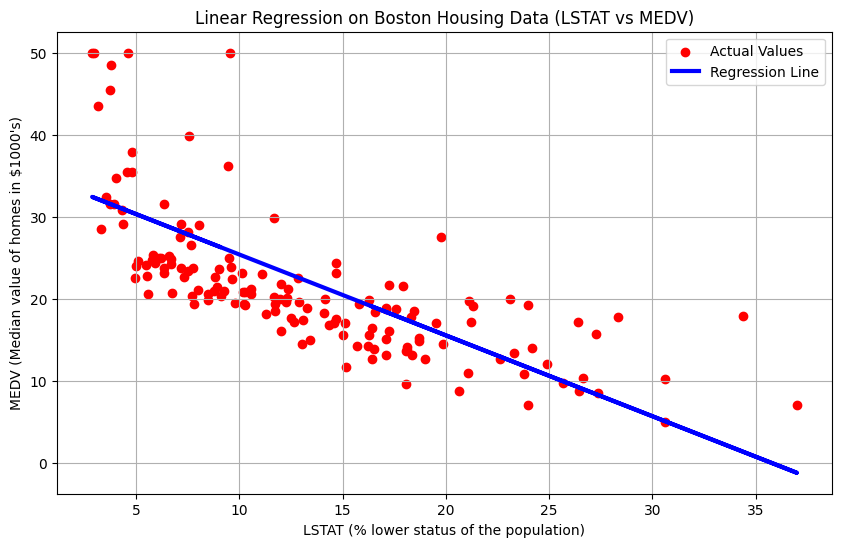

In [50]:
# We want to plot the regression line(blue) vs the actual value(red)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='red', label='Actual Values')

plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')

plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel('MEDV (Median value of homes in $1000\'s)')
plt.title('Linear Regression on Boston Housing Data (LSTAT vs MEDV)')
plt.legend()
plt.grid(True)
plt.show()

